In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
df = pd.read_csv('Data/RFP/2025_04_22.csv')
df.head()

,Strain,Sequence_infill,Sequence,Rel_RFP,Pred_RFP
0,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,AATACTAGAGGTCTTCCGACTCCGGGCGCTATCATGCCATACCGCG...,96614,0.337590
1,P533A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,AATACTAGAGGTCTTCCGACTTAACAATTAATCATCCGGCTCGTAA...,611645,0.379630
2,P5,TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA,AATACTAGAGGTCTTCCGACTTGACAATTAATCATCCGGCTCGTAA...,3687241,0.471274
3,OsmY,CCCGAGCGGTTTCAAAATTGTGATCTATATTTAACAAA,ATACTAGAGGTCTTCCGACCCCGAGCGGTTTCAAAATTGTGATCTA...,1974543,0.409059
4,OsmY_C12A,CCCGAGCGGTTTCAAAATTGTGATATATATTTAACAAA,TACTAGAGGTCTTCCGACCCCGAGCGGTTTCAAAATTGTGATATAT...,3459079,0.397303


In [3]:
model = keras.saving.load_model('Models/CNN_6_1_2.keras')

def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = []
    sequence
    for nucleotide in sequence:
        encoding += [mapping[nucleotide]]
    return encoding

sequences = df['Sequence'].apply(lambda x: x.replace('_', '')).tolist()
df['Pred_RFP'] = model.predict(np.array([padded_one_hot_encode(seq.zfill(150)) for seq in sequences])).flatten()
df.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


,Strain,Sequence_infill,Sequence,Rel_RFP,Pred_RFP
0,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,AATACTAGAGGTCTTCCGACTCCGGGCGCTATCATGCCATACCGCG...,96614,0.337590
1,P533A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,AATACTAGAGGTCTTCCGACTTAACAATTAATCATCCGGCTCGTAA...,611645,0.379630
2,P5,TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA,AATACTAGAGGTCTTCCGACTTGACAATTAATCATCCGGCTCGTAA...,3687241,0.471274
3,OsmY,CCCGAGCGGTTTCAAAATTGTGATCTATATTTAACAAA,ATACTAGAGGTCTTCCGACCCCGAGCGGTTTCAAAATTGTGATCTA...,1974543,0.409059
4,OsmY_C12A,CCCGAGCGGTTTCAAAATTGTGATATATATTTAACAAA,TACTAGAGGTCTTCCGACCCCGAGCGGTTTCAAAATTGTGATATAT...,3459079,0.397303


In [4]:
df.to_csv('Data/2025_04_22.csv', index=False)

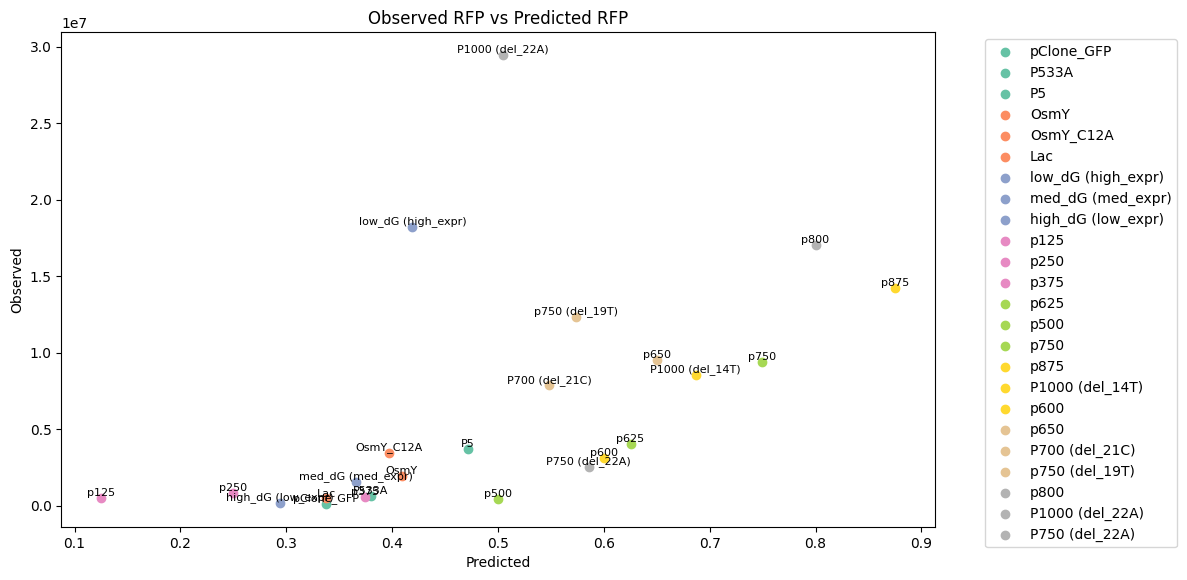

In [5]:
unique_promoters = df['Strain'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

plt.figure(figsize=(12, 6))

for promoter in unique_promoters:
    subset = df[df['Strain'] == promoter]
    color = color_map[promoter]
    plt.scatter(subset['Pred_RFP'], subset['Rel_RFP'], c=[color], label=promoter)

plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Observed RFP vs Predicted RFP')

for row in df.iterrows():
    plt.text(row[1]['Pred_RFP'], row[1]['Rel_RFP'], row[1]['Strain'], fontsize=8, ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

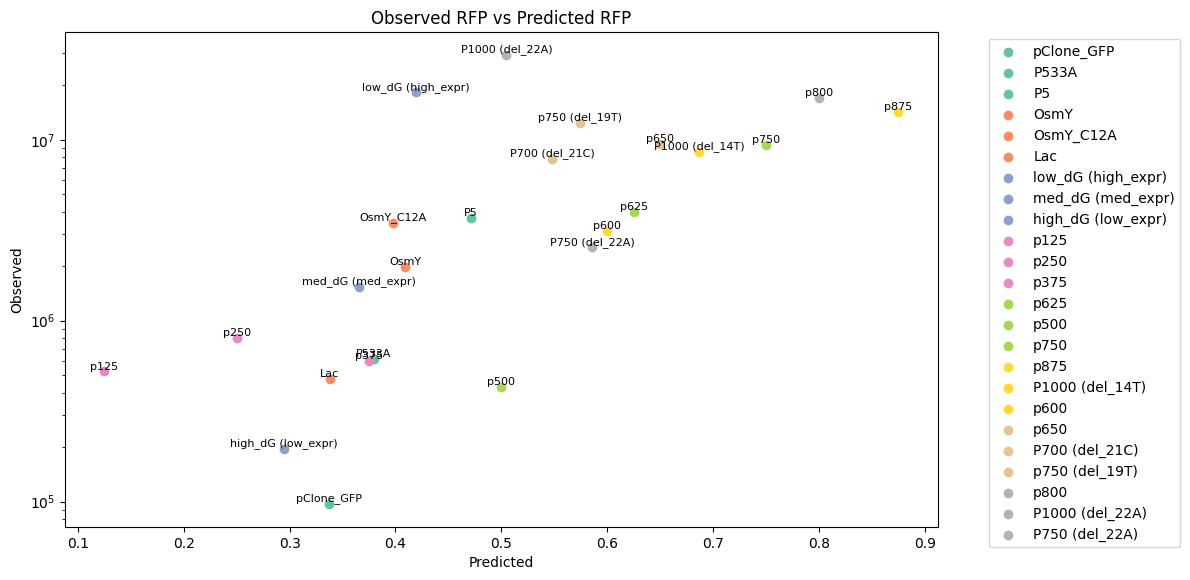

In [6]:
unique_promoters = df['Strain'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

plt.figure(figsize=(12, 6))

for promoter in unique_promoters:
    subset = df[df['Strain'] == promoter]
    color = color_map[promoter]
    plt.scatter(subset['Pred_RFP'], subset['Rel_RFP'], c=[color], label=promoter)

plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Observed RFP vs Predicted RFP')

for row in df.iterrows():
    plt.text(row[1]['Pred_RFP'], row[1]['Rel_RFP'], row[1]['Strain'], fontsize=8, ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# set to log
plt.yscale('log')
plt.show()

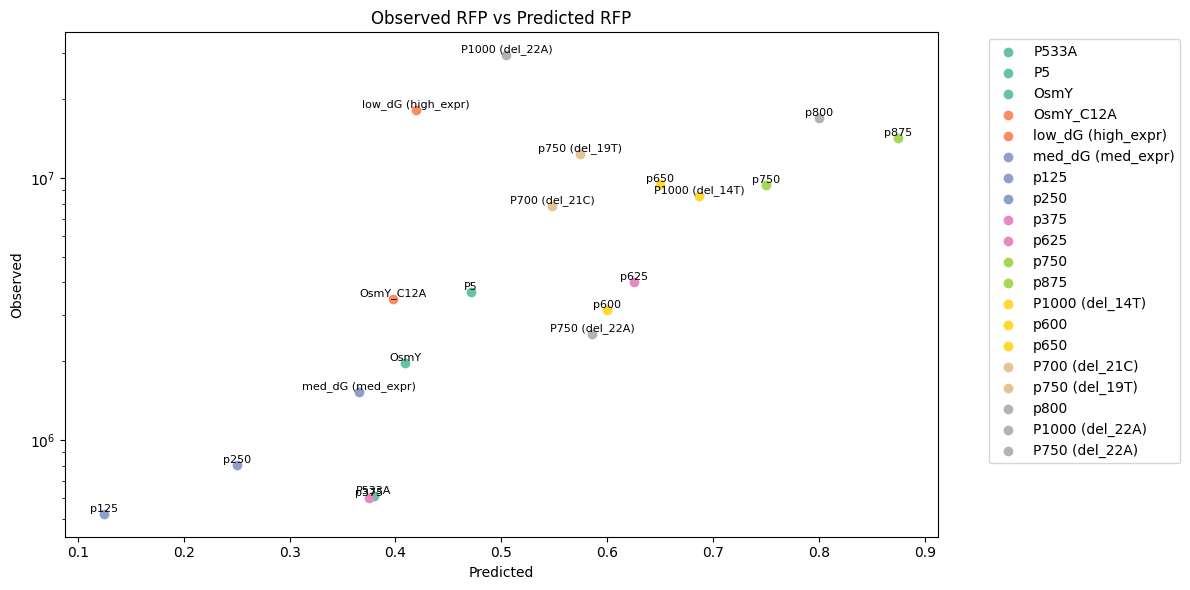

In [7]:
filtered_df = df[df['Rel_RFP'] > 500000]

unique_promoters = filtered_df['Strain'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

plt.figure(figsize=(12, 6))

for promoter in unique_promoters:
    subset = filtered_df[filtered_df['Strain'] == promoter]
    color = color_map[promoter]
    plt.scatter(subset['Pred_RFP'], subset['Rel_RFP'], c=[color], label=promoter)

plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Observed RFP vs Predicted RFP')

for row in filtered_df.iterrows():
    plt.text(row[1]['Pred_RFP'], row[1]['Rel_RFP'], row[1]['Strain'], fontsize=8, ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# set to log
plt.yscale('log')
plt.show()